# a)

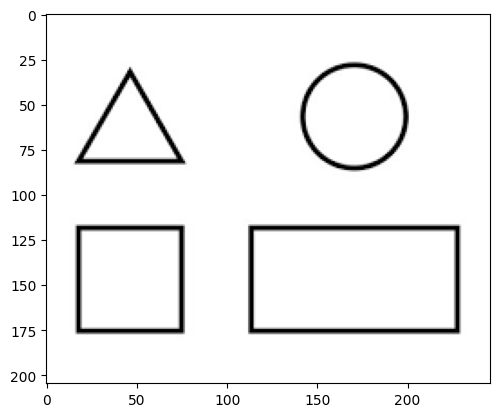

In [140]:
import cv2 as cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/Q7.png')
plt.imshow(img, cmap = 'gray')
plt.show()

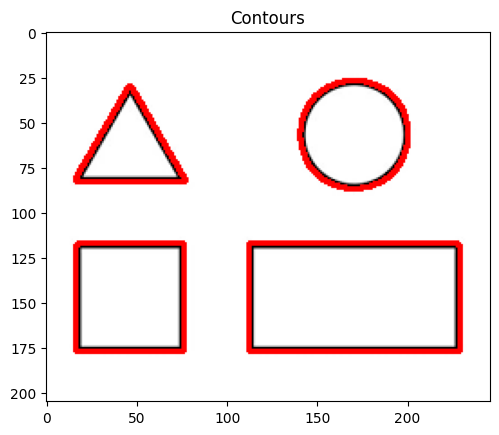

In [141]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
  
# Let's load a simple image with 3 black squares
image = cv2.imread('images/Q7.png')
cv2.waitKey(0)
  
# Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  
# Find Canny edges
edged = cv2.Canny(gray, 30, 200)
cv2.waitKey(0)
  
contours, hierarchy = cv2.findContours(edged, 
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  
# Draw all contours
# -1 signifies drawing all contours
cv2.drawContours(image, contours, -1, (255, 0, 0), 2)
  
plt.imshow(image, cmap = 'gray')
plt.title('Contours')
plt.show()

In [142]:
def draw_shape(img, shape_type, contour):
    perimeter = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.04 * perimeter, True)
    (x, y, w, h) = cv2.boundingRect(approx)
    text_x = int(x + w/2 - 20)
    text_y = y - 10
    
    cv2.drawContours(img, [approx], 0, (0, 255, 0), 2)

    for corner in approx.squeeze():
        cv2.circle(img, tuple(corner), 3, (255, 0, 0), -1)

    cv2.putText(img, shape_type, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 0, 255), 1)

    return img


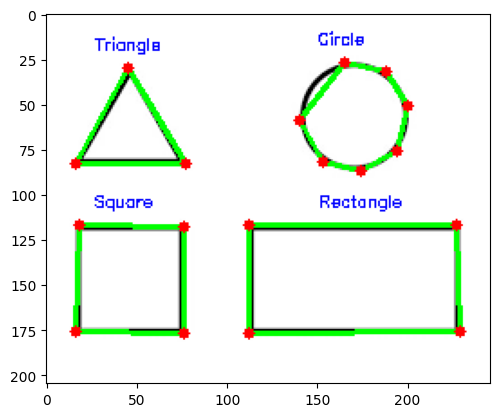

In [143]:
for contour in contours:
    shape = ""
    perimeter = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.04 * perimeter, True)

    if len(approx) == 3:
        shape = "Triangle"
    elif len(approx) == 4:
        x, y, w, h = cv2.boundingRect(approx)
        aspectRatio = float(w)/h
        if aspectRatio >= 0.95 and aspectRatio <= 1.05:
            shape = "Square"
        else:
            shape = "Rectangle"
    elif len(approx) > 6:
        shape = "Circle"

    if shape:
        img = draw_shape(img, shape, contour)

plt.imshow(img, cmap = 'gray')
plt.show()